In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

print('X')
print(X)
print('y')
print(y)

X
[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]

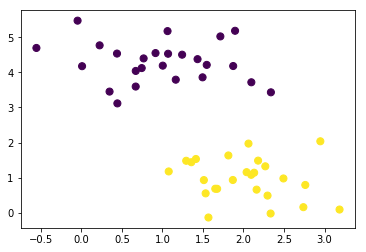

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [5]:
# "Support Vector Classifier"
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)
print(clf)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


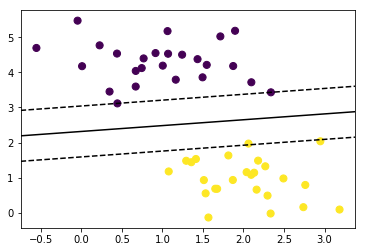

In [6]:
# To better visualize what's happening here, let's create a quick convenience
# function that will plot SVM decision boundaries for us:
def plot_svc_decision_function(clf):
    """Plot the decision function for a 2D SVC"""
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
        y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
        Y, X = np.meshgrid(y, x)
        P = np.zeros_like(X)
        for i, xi in enumerate(x):
            for j, yj in enumerate(y):
                P[i, j] = clf.decision_function([xi, yj])
        return plt.contour(X, Y, P, colors='k',
                           levels=[-1, 0, 1],
                           linestyles=['--', '-', '--'])

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)

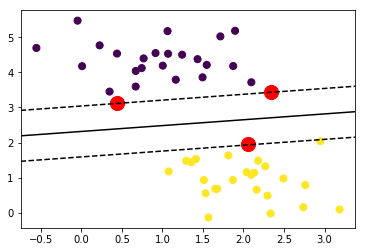

In [7]:
#Notice that the dashed lines touch a couple of the points: these points are
#known as the "support vectors", and are stored in the support_vectors_
#attribute of the classifier:
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, facecolors='red')

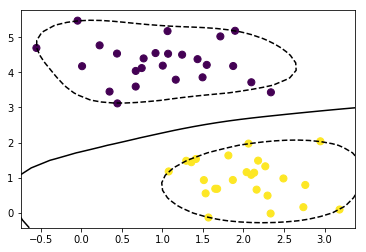

In [8]:
#The above version uses a linear kernel; it is also possible to use radial basis
# function kernels as well as others.
clf = SVC(kernel='rbf')
clf.fit(X, y)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')